# First Convolutional Neural Network with Keras

## Importation

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow.keras.datasets.mnist as mnist

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical

In [42]:
import os

save_dir = "/content/drive/MyDrive/Colab Notebooks/FDAA"
os.makedirs(save_dir, exist_ok=True)

## Loading and processing data

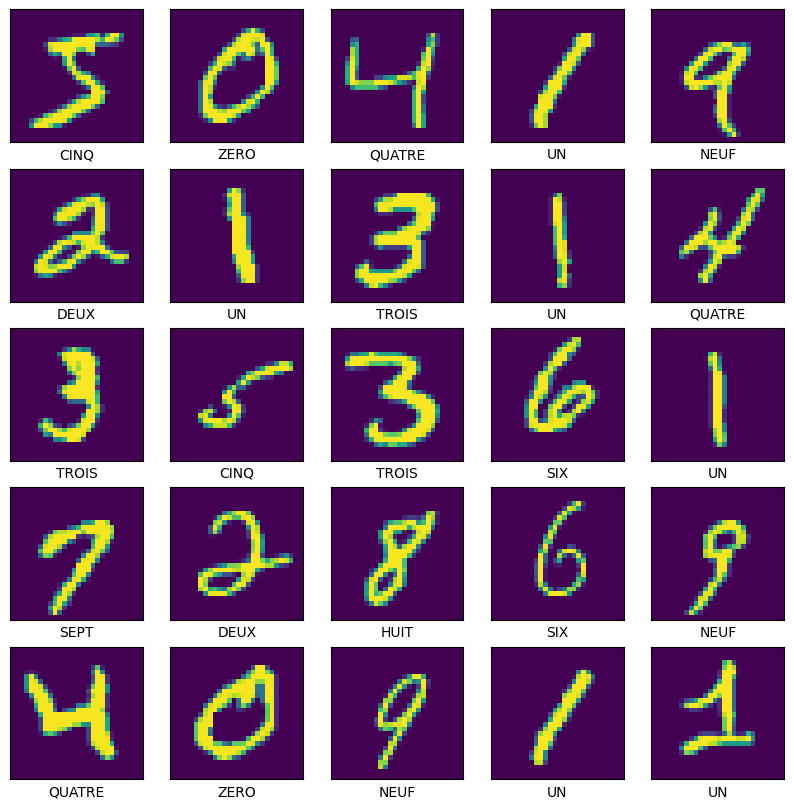

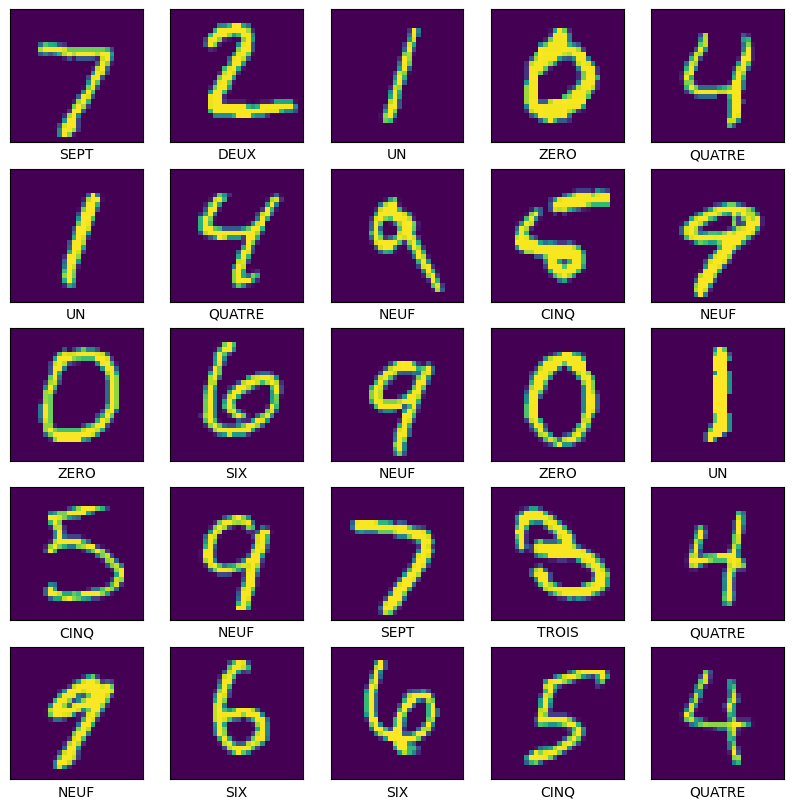

In [7]:
# MNIST
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = {j:i for i,j in zip(['ZERO', 'UN', 'DEUX', 'TROIS', 'QUATRE', 'CINQ',
               'SIX', 'SEPT', 'HUIT', 'NEUF'], range(10))}

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

## Model

### Definition

In [8]:
# Feature map layers
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))  # output shape : 26x26x32
model.add(MaxPooling2D(pool_size=(2, 2)))  # output shape : 13x13x32

# Classifier layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

The Flatten layer, as its name indicates, flatten its input, so with an input of shape 13x13x32 the output will be *13 * 13 * 32 = 5048*.

The model has a number of 347 146 parameters.

### Training and Evaluation

In [9]:
x_train_split, x_val_split, y_train_labels, y_val_labels = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

y_train_one_hot = to_categorical(y_train_labels, num_classes=10)
y_val_one_hot = to_categorical(y_val_labels, num_classes=10)

x_train_reshaped = x_train_split.reshape(x_train_split.shape[0], 28, 28, 1)
x_val_reshaped = x_val_split.reshape(x_val_split.shape[0], 28, 28, 1)

In [10]:
model.fit(x_train_reshaped, y_train_one_hot, epochs=50, batch_size=32, validation_data=(x_val_reshaped, y_val_one_hot), verbose=0)

In [45]:
model.save_weights(os.path.join(save_dir,'model.weights.h5'))

In [12]:
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_test_one_hot = to_categorical(y_test, num_classes=10)

evaluation_dict = model.evaluate(x_test_reshaped, y_test_one_hot, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.1061


In [13]:
evaluation_dict

{'accuracy': 0.9866999983787537, 'loss': 0.09860605746507645}

In [14]:
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)

incorrects = np.where(pred_classes != y_test)[0]
incorrects

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([ 321,  340,  431,  445,  582,  619,  659,  717,  740,  882,  938,
        947, 1014, 1033, 1039, 1226, 1232, 1242, 1247, 1319, 1326, 1393,
       1403, 1414, 1621, 1681, 1709, 1754, 1878, 1901, 1955, 2035, 2040,
       2070, 2118, 2129, 2130, 2135, 2182, 2293, 2329, 2597, 2654, 2760,
       2771, 2823, 2836, 2896, 2921, 2953, 3060, 3073, 3100, 3225, 3330,
       3422, 3441, 3448, 3451, 3503, 3520, 3558, 3727, 3730, 3762, 3818,
       3853, 3893, 3902, 3906, 3943, 3985, 4007, 4065, 4078, 4176, 4193,
       4201, 4289, 4497, 4578, 4620, 4639, 4740, 4807, 4814, 4823, 4837,
       4860, 4943, 5246, 5331, 5634, 5642, 5654, 5802, 5887, 5937, 5955,
       5981, 5997, 6071, 6081, 6091, 6166, 6555, 6560, 6574, 6597, 6651,
       6783, 6847, 7842, 8246, 8277, 8408, 8519, 8527, 9009, 9015, 9019,
       9024, 9587, 9638, 9642, 9664, 9729, 9733, 9755, 9839, 9850, 9879,
       9905])

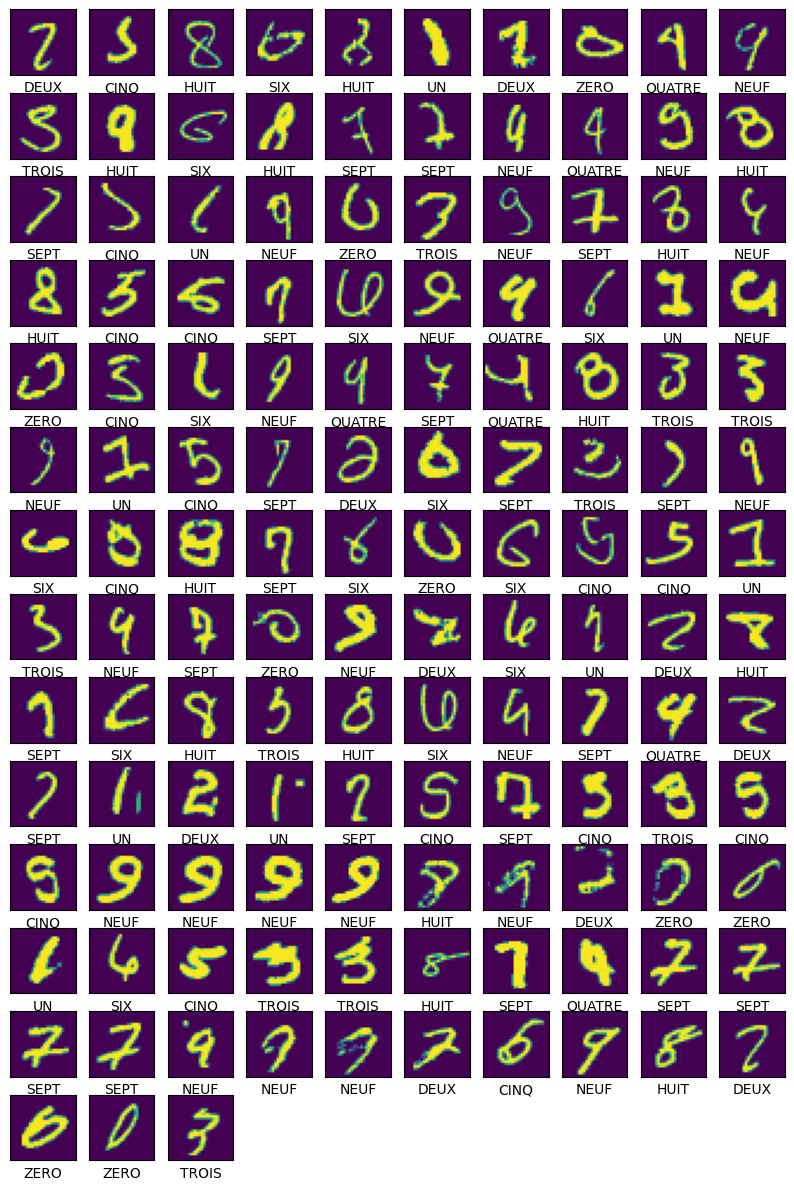

In [17]:
plt.figure(figsize=(10,15))
for id, i in enumerate(incorrects):
    plt.subplot(1+ len(incorrects)//10,10,id+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

## Convolutional Neural Network

In [18]:
cnn = Sequential(
    [
        Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), padding='same'),
        Conv2D(16, kernel_size=3, padding='same'),
        Conv2D(8,kernel_size=3, padding='same'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)
cnn.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy, metrics=['accuracy'])
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,226 (1.56 MB)

 Trainable params: 408,226 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Le modèle précédent possède un total de 408,226 paramètres.

In [19]:
cnn.fit(x_train_reshaped, y_train_one_hot, epochs=150, batch_size=32, validation_data=(x_val_reshaped, y_val_one_hot), verbose=0)

In [43]:
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_test_one_hot = to_categorical(y_test, num_classes=10)

evaluation_dict = cnn.evaluate(x_test_reshaped, y_test_one_hot, return_dict=True)
cnn.save_weights(os.path.join(save_dir,'cnn.weights.h5'))

ValueError: cannot reshape array of size 30720000 into shape (10000,28,28,1)

## CNN with CIFAR10

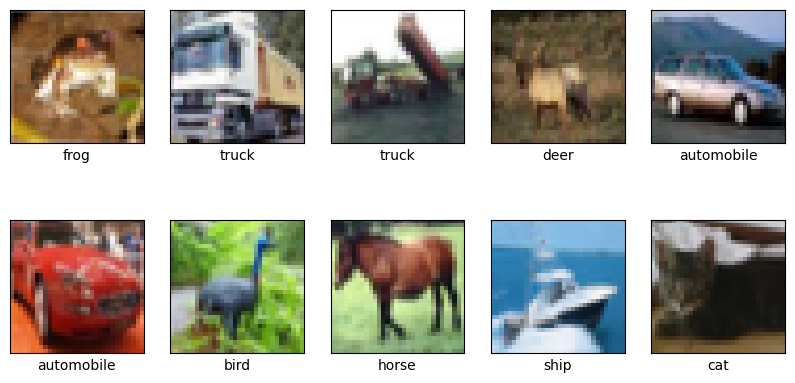

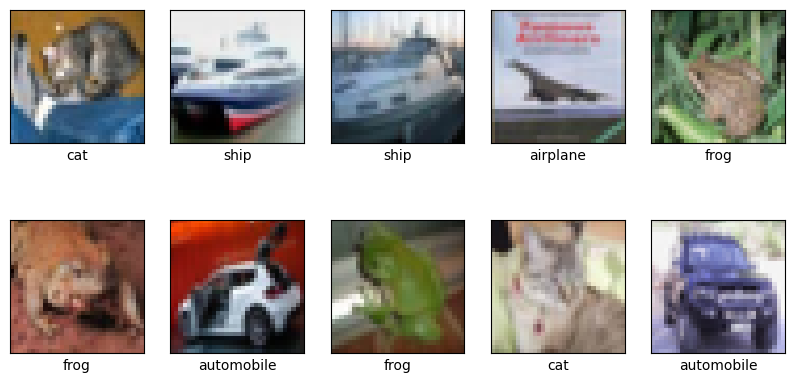

In [34]:
from tensorflow.keras.datasets import cifar10

# CIFAR10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = {j:i for i,j in zip(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck'], range(10))}

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [77]:
cifar_cnn = Sequential(
    [
        Conv2D(256, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64,kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32,kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

cifar_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
cifar_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,370 (1.54 MB)

 Trainable params: 403,370 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
x_train_reshaped = x_train.reshape(x_train.shape[0], 32, 32, 3)
y_train_one_hot = to_categorical(y_train, num_classes=10)

cifar_history = cifar_cnn.fit(x_train_reshaped, y_train_one_hot, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [74]:
cifar_cnn.save_weights(os.path.join(save_dir, "cifar_cnn.weights.h5"))

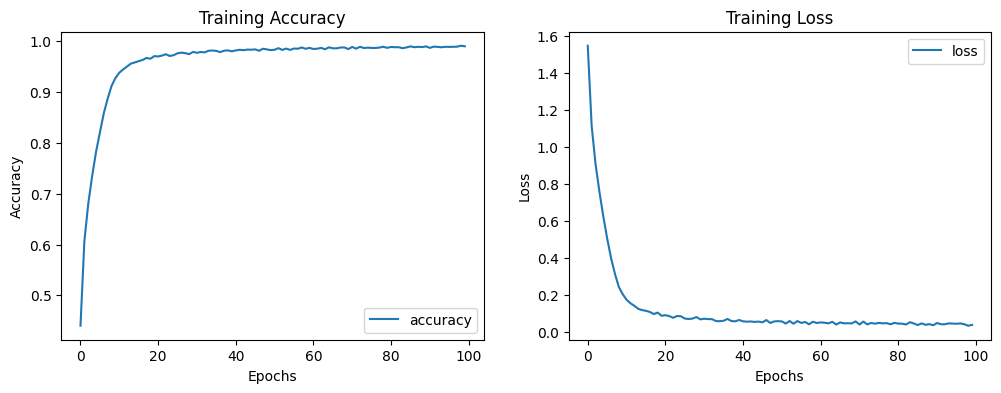

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(cifar_history.history['accuracy'], label='accuracy')
axes[0].set_title('Training Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(False)
axes[1].plot(cifar_history.history['loss'], label='loss')
axes[1].set_title('Training Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(False)
plt.show()

In [73]:
x_test_reshaped = x_test.reshape(x_test.shape[0], 32, 32, 3)
y_test_one_hot = to_categorical(y_test, num_classes=10)

evaluation_dict = cifar_cnn.evaluate(x_test_reshaped, y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6069 - loss: 6.4274


In [79]:
cifar_cnn_dp = Sequential(
    [
        Conv2D(256, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64,kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(32,kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

cifar_cnn_dp.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
cifar_cnn_dp.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,370 (1.54 MB)

 Trainable params: 403,370 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
cifar_dp_history = cifar_cnn_dp.fit(x_train_reshaped, y_train_one_hot, epochs=70, batch_size=32, validation_split=0.2, verbose=0)
cifar_cnn_dp.save_weights(os.path.join(save_dir, "cifar_cnn_dp.weights.h5"))

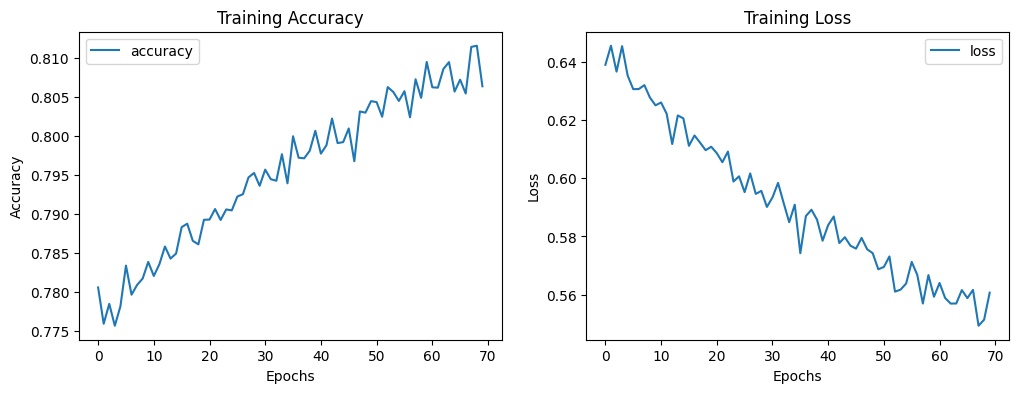

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(cifar_dp_history.history['accuracy'], label='accuracy')
axes[0].set_title('Training Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(False)
axes[1].plot(cifar_dp_history.history['loss'], label='loss')
axes[1].set_title('Training Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(False)
plt.show()

In [86]:
!pip install pml_utils

ERROR: Could not find a version that satisfies the requirement pml_utils (from versions: none)
ERROR: No matching distribution found for pml_utils


In [85]:
import pml_utils
from pml_utils import show_failures

pred = cifar_cnn_dp.predict(x_test_reshaped)
for i in range(10):
  show_failures(pred, y_test_one_hot, x_test_reshaped, trueclass=i)

ModuleNotFoundError: No module named 'pml_utils'